In [ ]:
# Step 0: Upload dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Read the uploaded file (rename below if different)
df = pd.read_csv("us_retail_grouped_safety_stock_updated.csv")

# Preview top rows
df.head()


Saving us_retail_grouped_safety_stock_updated.csv to us_retail_grouped_safety_stock_updated.csv


,naics_code,kind_of_business,sales_month,sales,estimate_type,year,month,quarter,sales_scaled,safety_stock,month_year,business_category
0,45291,Warehouse clubs and superstores,01-01-1992,2579.0,not adjusted,1992,1,1,0.003352,322,1992-01,General Merchandise
1,NaN,Retail sales and food services excl motor vehi...,01-01-1992,117814.0,adjusted,1992,1,1,0.153822,28292,1992-01,Food & Beverages
2,NaN,Retail sales and food services excl gasoline s...,01-01-1992,151292.0,adjusted,1992,1,1,0.197536,29714,1992-01,Food & Beverages
3,NaN,Retail sales and food services excl motor vehi...,01-01-1992,130617.0,adjusted,1992,1,1,0.170540,22170,1992-01,Food & Beverages
4,NaN,"Retail and food services sales, total",01-01-1992,164095.0,adjusted,1992,1,1,0.214254,13325,1992-01,Food & Beverages


In [ ]:
#STEP 1 – Data Cleaning & Preprocessing

# Check structure and data types
df.info()

# Check for missing values
df.isnull().sum()

# Drop duplicates (if any)
df = df.drop_duplicates()

# Forward-fill missing numeric values (time-series friendly)
df = df.fillna(method='ffill')

# Convert date column to datetime and sort
df['sales_month'] = pd.to_datetime(df['sales_month'])
df = df.sort_values('sales_month')

# Confirm cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   naics_code         34977 non-null  object 
 1   kind_of_business   40479 non-null  object 
 2   sales_month        40479 non-null  object 
 3   sales              40479 non-null  float64
 4   estimate_type      40479 non-null  object 
 5   year               40479 non-null  int64  
 6   month              40479 non-null  int64  
 7   quarter            40479 non-null  int64  
 8   sales_scaled       39493 non-null  float64
 9   safety_stock       40479 non-null  int64  
 10  month_year         40479 non-null  object 
 11  business_category  40479 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 40479 entries, 0 to 40478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype        

/tmp/ipython-input-1344905715.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
#STEP 2 – Exploratory Data Analysis (EDA)
#2.1 Summary Statistics

df.describe()


,sales_month,sales,year,month,quarter,sales_scaled,safety_stock
count,40479,40479.000000,40479.000000,40479.000000,40479.00000,40479.000000,40479.000000
mean,2007-11-23 05:18:46.717557248,55660.498620,2007.877863,6.465649,2.48855,0.071809,8336.073248
min,1992-01-01 00:00:00,12.000000,1992.000000,1.000000,1.00000,0.000000,50.000000
25%,2000-01-03 00:00:00,3827.000000,2000.000000,3.000000,1.00000,0.004689,529.000000
50%,2008-01-05 00:00:00,14323.000000,2008.000000,6.000000,2.00000,0.017192,1947.000000
75%,2016-01-07 00:00:00,50513.500000,2016.000000,9.000000,3.00000,0.059559,6955.500000
max,2024-01-09 00:00:00,765846.000000,2024.000000,12.000000,4.00000,1.000000,174682.000000
std,NaN,106159.895987,9.454727,3.441958,1.11457,0.139485,17367.479651


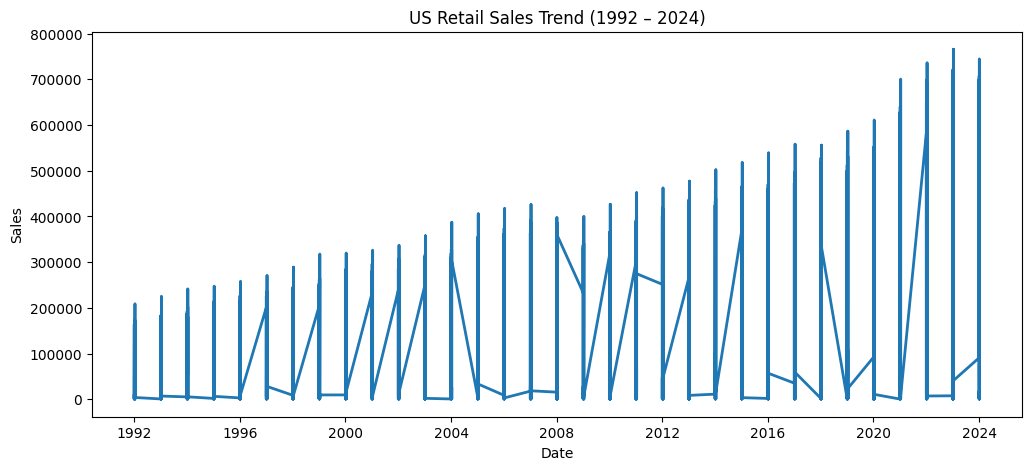

In [ ]:
#Time-Series Sales Trend Plot (1992 – 2024)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['sales_month'], df['sales'], linewidth=2)
plt.title("US Retail Sales Trend (1992 – 2024)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


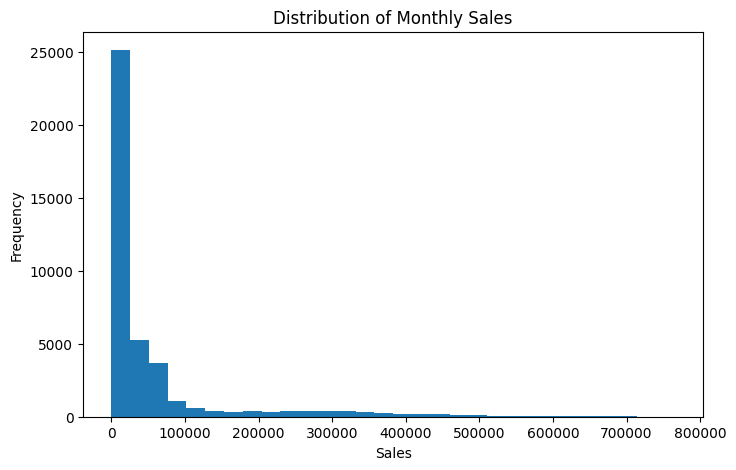

In [ ]:
#Histogram — Sales Distribution

plt.figure(figsize=(8,5))
plt.hist(df['sales'], bins=30)
plt.title("Distribution of Monthly Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


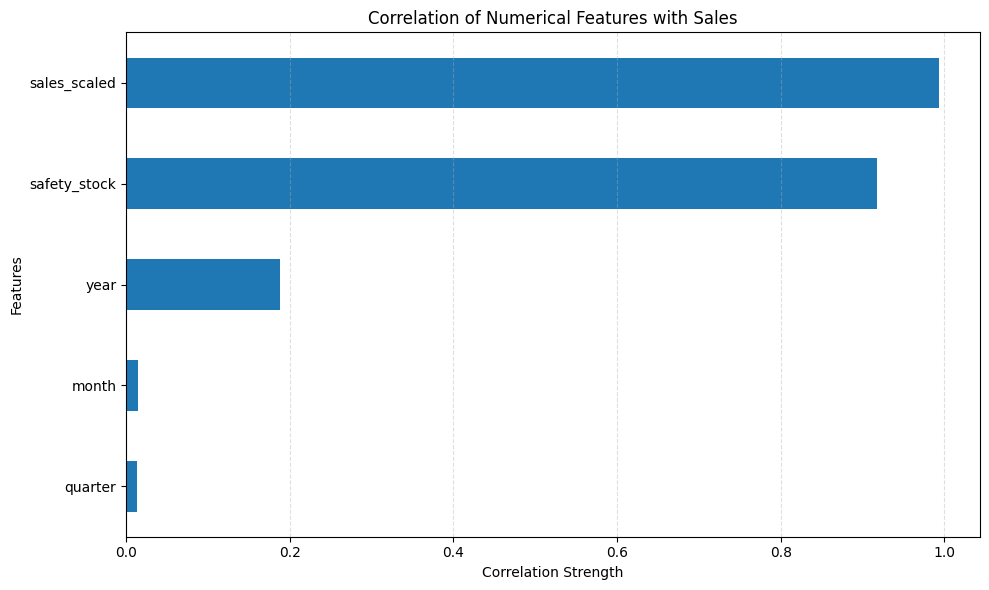

In [ ]:
# Correlation Bar Chart (Better Interpretability)

import matplotlib.pyplot as plt
import pandas as pd

# Compute correlations with the target variable
numeric_df = df.select_dtypes(include='number')
corr_values = numeric_df.corr()['sales']  # replace 'sales' with your target column

# Drop self-correlation and sort
corr_values = corr_values.drop('sales').sort_values()

plt.figure(figsize=(10, 6))
corr_values.plot(kind='barh')

plt.title("Correlation of Numerical Features with Sales")
plt.xlabel("Correlation Strength")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


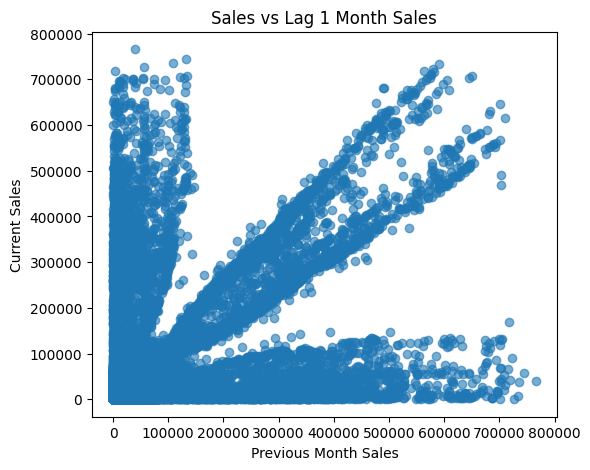

In [ ]:
# Scatter Plot — Sales vs Lag Features

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has a 'sales' column
df['lag_1'] = df['sales'].shift(1)  # Create lag feature
df = df.dropna(subset=['lag_1'])    # Remove rows where lag_1 is NaN

# Scatter Plot — Sales vs Lag Features
plt.figure(figsize=(6,5))
plt.scatter(df['lag_1'], df['sales'], alpha=0.6)
plt.title("Sales vs Lag 1 Month Sales")
plt.xlabel("Previous Month Sales")
plt.ylabel("Current Sales")
plt.show()



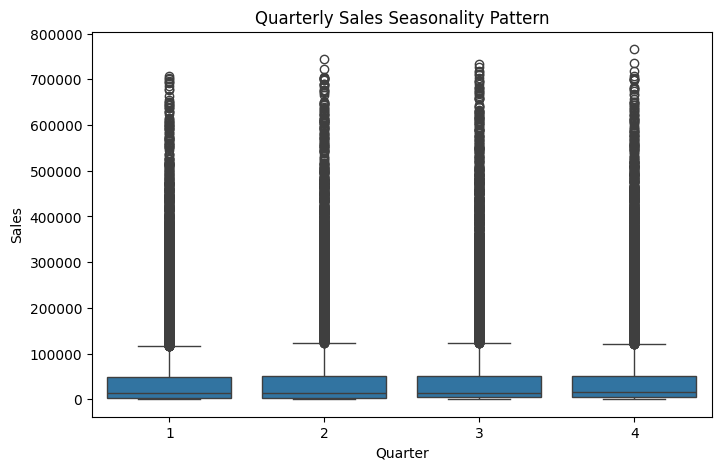

In [ ]:
#Boxplot — Quarterly Seasonality
import seaborn as sns


plt.figure(figsize=(8,5))
sns.boxplot(x='quarter', y='sales', data=df)
plt.title("Quarterly Sales Seasonality Pattern")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.show()


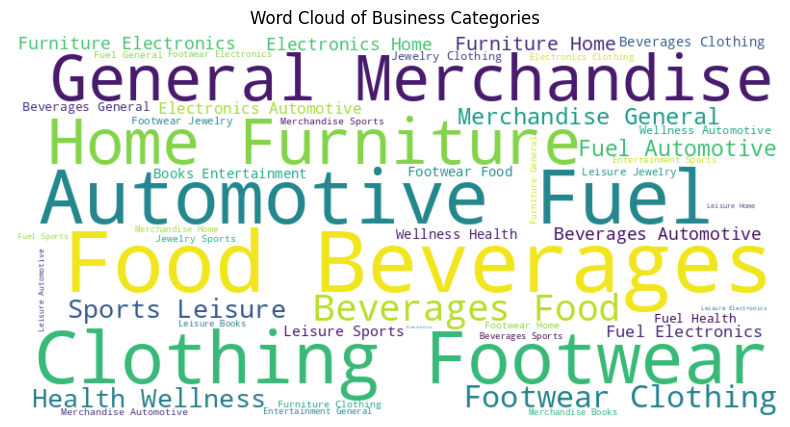

In [ ]:
#Optional — Word Cloud for Business Categories

from wordcloud import WordCloud

text = " ".join(df['business_category'].astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Business Categories")
plt.show()


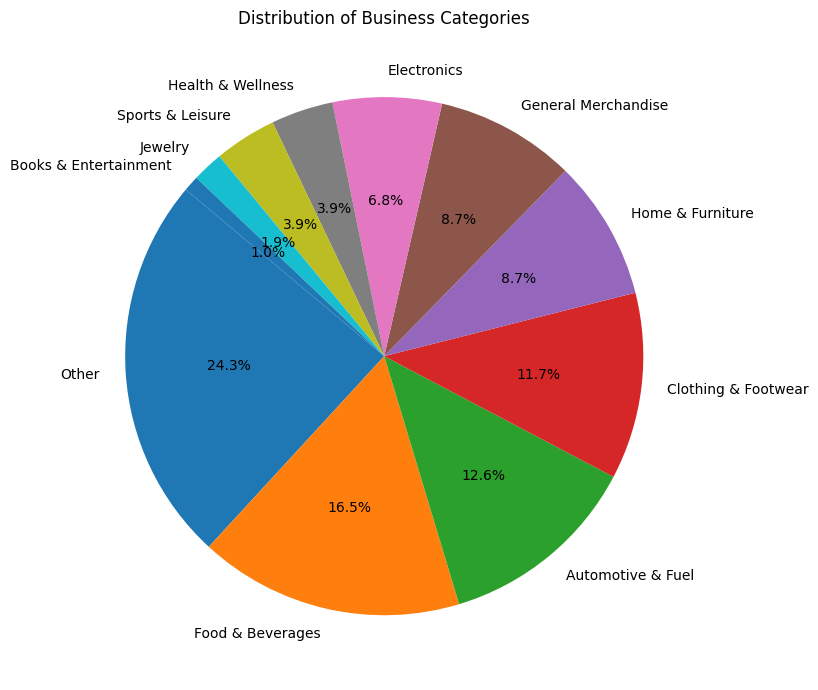

In [ ]:
# Pie Chart for Business Category Distribution

import matplotlib.pyplot as plt

# Count the occurrences of each business category
category_counts = df['business_category'].astype(str).value_counts()

plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 10})

plt.title("Distribution of Business Categories")
plt.tight_layout()
plt.show()


In [ ]:
#STEP 3 – Feature Engineering & Dimensionality Reduction
#3.1 Create Lag and Rolling Features

df['lag_1']  = df['sales'].shift(1)
df['lag_3']  = df['sales'].shift(3)
df['rolling_mean_3']  = df['sales'].rolling(3).mean()
df.dropna(inplace=True)


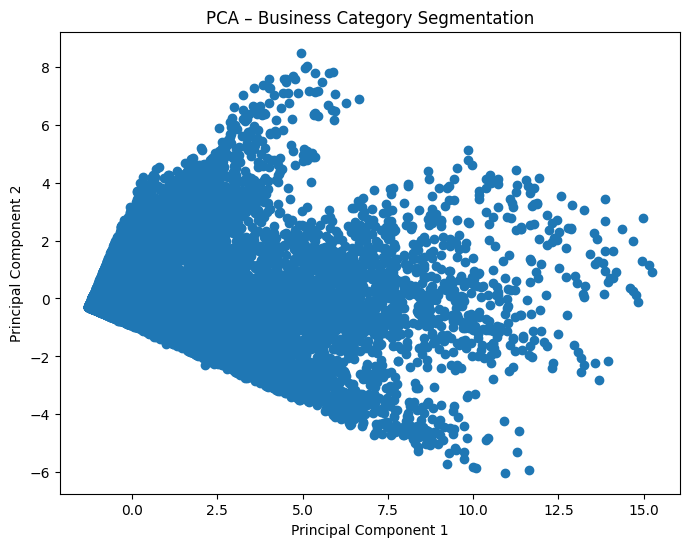

In [ ]:
#3.2 Principal Component Analysis (PCA)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_cols = df.select_dtypes(include='number').drop(columns=['year','month','quarter']).columns
X = df[num_cols].fillna(0)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'])
plt.title("PCA – Business Category Segmentation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


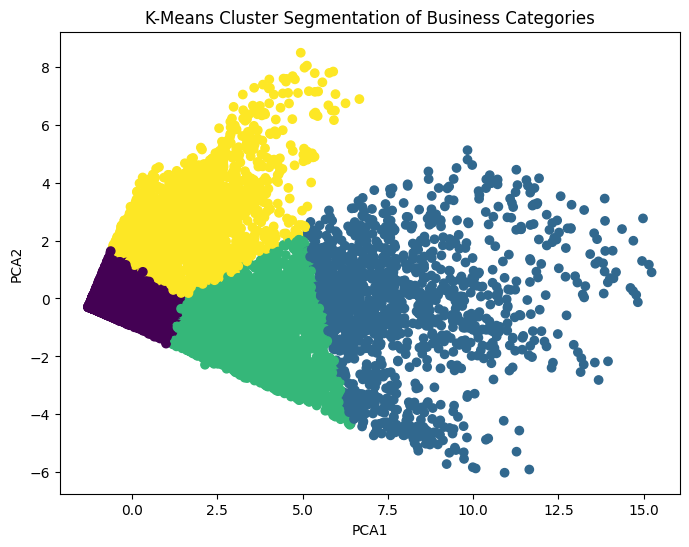

In [ ]:
#3.3 K-Means Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['PCA1','PCA2']])

plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Cluster Segmentation of Business Categories")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


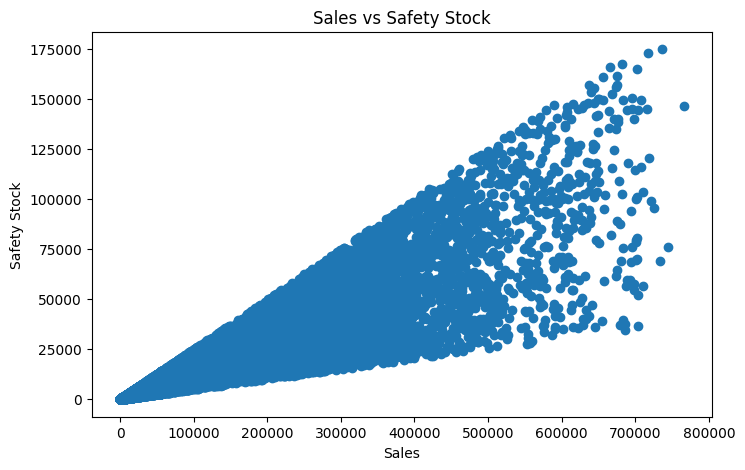

In [ ]:
#3.4 Sales vs Safety Stock

plt.figure(figsize=(8,5))
plt.scatter(df['sales'], df['safety_stock'])
plt.title("Sales vs Safety Stock")
plt.xlabel("Sales")
plt.ylabel("Safety Stock")
plt.show()


In [ ]:

!pip install prophet --quiet
!pip install pmdarima --quiet
!pip install wordcloud --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
#Upload / Load dataset
# Why: Load dataset, convert date column to datetime, sort chronologically — mandatory for time series.

from google.colab import files
import pandas as pd
import numpy as np

# Upload file dialog (use this in Colab)
uploaded = files.upload()

# Replace with your filename after upload if needed
fn = list(uploaded.keys())[0]
print("Loaded:", fn)

df = pd.read_csv(fn)

# Basic info
df['sales_month'] = pd.to_datetime(df['sales_month'])
df = df.sort_values('sales_month').reset_index(drop=True)
df.info()
df.head()


Saving us_retail_grouped_safety_stock_updated.csv to us_retail_grouped_safety_stock_updated (1).csv
Loaded: us_retail_grouped_safety_stock_updated (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   naics_code         34977 non-null  object        
 1   kind_of_business   40479 non-null  object        
 2   sales_month        40479 non-null  datetime64[ns]
 3   sales              40479 non-null  float64       
 4   estimate_type      40479 non-null  object        
 5   year               40479 non-null  int64         
 6   month              40479 non-null  int64         
 7   quarter            40479 non-null  int64         
 8   sales_scaled       39493 non-null  float64       
 9   safety_stock       40479 non-null  int64         
 10  month_year         40479 non-null  object        
 11  business_categor

,naics_code,kind_of_business,sales_month,sales,estimate_type,year,month,quarter,sales_scaled,safety_stock,month_year,business_category
0,45291,Warehouse clubs and superstores,1992-01-01,2579.0,not adjusted,1992,1,1,0.003352,322,1992-01,General Merchandise
1,441,Motor vehicle and parts dealers,1992-01-01,29811.0,not adjusted,1992,1,1,0.038911,5837,1992-01,Automotive & Fuel
2,NaN,GAFO(1),1992-01-01,33906.0,not adjusted,1992,1,1,0.044258,6489,1992-01,Other
3,NaN,"Retail sales, total (excl. motor vehicle and p...",1992-01-01,100872.0,not adjusted,1992,1,1,0.131700,21495,1992-01,Automotive & Fuel
4,NaN,"Retail sales, total",1992-01-01,130683.0,not adjusted,1992,1,1,0.170626,6678,1992-01,Other


In [ ]:
#2. Quick cleaning & baseline features
#Why: Ensure required columns exist and add time-based features for seasonality analysis.

# Drop duplicates
df = df.drop_duplicates()

# Fill small gaps forward (time-series friendly)
df = df.fillna(method='ffill').fillna(method='bfill')

# Ensure the core columns exist
required = ['sales_month','sales','business_category','safety_stock','reorder_point']
for c in required:
    if c not in df.columns:
        print("Warning: missing", c)

# Extract time parts
df['year'] = df['sales_month'].dt.year
df['month'] = df['sales_month'].dt.month
df['quarter'] = df['sales_month'].dt.quarter

# Add month_year string for grouping/plotting
df['month_year'] = df['sales_month'].dt.to_period('M').astype(str)

df.head()


/tmp/ipython-input-27925311.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,naics_code,kind_of_business,sales_month,sales,estimate_type,year,month,quarter,sales_scaled,safety_stock,month_year,business_category
0,45291,Warehouse clubs and superstores,1992-01-01,2579.0,not adjusted,1992,1,1,0.003352,322,1992-01,General Merchandise
1,441,Motor vehicle and parts dealers,1992-01-01,29811.0,not adjusted,1992,1,1,0.038911,5837,1992-01,Automotive & Fuel
2,441,GAFO(1),1992-01-01,33906.0,not adjusted,1992,1,1,0.044258,6489,1992-01,Other
3,441,"Retail sales, total (excl. motor vehicle and p...",1992-01-01,100872.0,not adjusted,1992,1,1,0.131700,21495,1992-01,Automotive & Fuel
4,441,"Retail sales, total",1992-01-01,130683.0,not adjusted,1992,1,1,0.170626,6678,1992-01,Other


In [ ]:
# 3. EDA quick statistics (you'll include more visuals later)
# Why: Quick checks for central tendency, seasonality and category importance.

# Summary stats
print(df['sales'].describe())

# Monthly average (seasonality)
monthly_avg = df.groupby('month')['sales'].mean()
print(monthly_avg)

# Category totals
cat_totals = df.groupby('business_category')['sales'].sum().sort_values(ascending=False)
print(cat_totals.head(10))


count     40479.000000
mean      55660.498620
std      106159.895987
min          12.000000
25%        3827.000000
50%       14323.000000
75%       50513.500000
max      765846.000000
Name: sales, dtype: float64
month
1    55660.49862
Name: sales, dtype: float64
business_category
Food & Beverages       1.159008e+09
Other                  4.319994e+08
Automotive & Fuel      3.776773e+08
General Merchandise    9.568815e+07
Home & Furniture       5.728945e+07
Electronics            4.716191e+07
Clothing & Footwear    4.191853e+07
Health & Wellness      2.897976e+07
Sports & Leisure       6.640031e+06
Jewelry                6.314377e+06
Name: sales, dtype: float64


In [ ]:
# 4. Create lag/rolling features (for models and EDA)
#Why: Lags and rolling stats are useful features for regression/time-series models and for the scatter charts you must show.

# Create lag and rolling features per business_category (group-wise)
df = df.sort_values(['business_category','sales_month']).reset_index(drop=True)

# lags 1,3,12 (months)
df['lag_1'] = df.groupby('business_category')['sales'].shift(1)
df['lag_3'] = df.groupby('business_category')['sales'].shift(3)
df['lag_12'] = df.groupby('business_category')['sales'].shift(12)

# rolling means
df['roll_mean_3'] = df.groupby('business_category')['sales'].transform(lambda x: x.rolling(3).mean())
df['roll_mean_12'] = df.groupby('business_category')['sales'].transform(lambda x: x.rolling(12).mean())

# drop initial NaN rows created by shift (we'll keep a copy for plotting if needed)
df_model = df.dropna(subset=['lag_1']).reset_index(drop=True)

df_model.head()


,naics_code,kind_of_business,sales_month,sales,estimate_type,year,month,quarter,sales_scaled,safety_stock,month_year,business_category,lag_1,lag_3,lag_12,roll_mean_3,roll_mean_12
0,441,"Retail sales, total (excl. motor vehicle and p...",1992-01-01,100872.0,not adjusted,1992,1,1,0.131700,21495,1992-01,Automotive & Fuel,29811.0,NaN,NaN,NaN,NaN
1,4411,Automobile dealers,1992-01-01,25800.0,not adjusted,1992,1,1,0.033673,1672,1992-01,Automotive & Fuel,100872.0,NaN,NaN,52161.000000,NaN
2,4413,"Automotive parts, acc., and tire stores",1992-01-01,3311.0,adjusted,1992,1,1,0.004308,402,1992-01,Automotive & Fuel,25800.0,29811.0,NaN,43327.666667,NaN
3,44114412,Automobile and other motor vehicle dealers,1992-01-01,30167.0,adjusted,1992,1,1,0.039375,3203,1992-01,Automotive & Fuel,3311.0,100872.0,NaN,19759.333333,NaN
4,4413,"Automotive parts, acc., and tire stores",1992-01-01,3023.0,not adjusted,1992,1,1,0.003932,673,1992-01,Automotive & Fuel,30167.0,25800.0,NaN,12167.000000,NaN


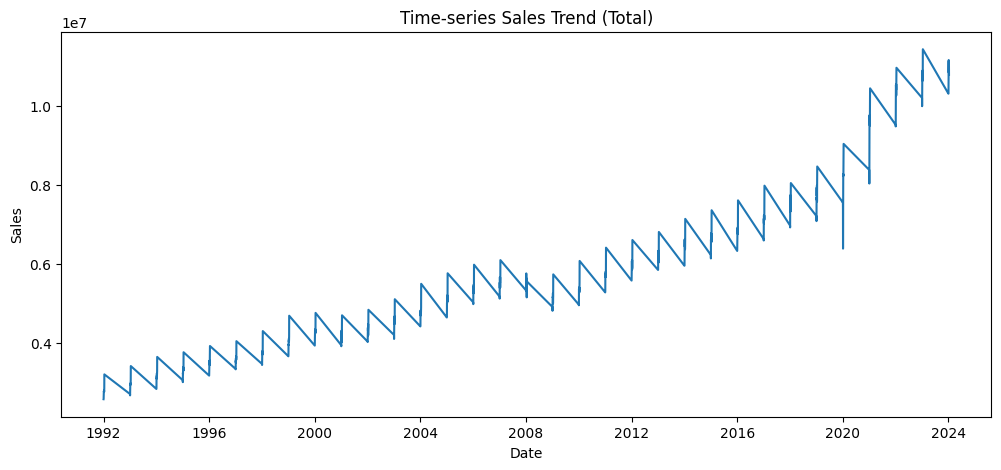

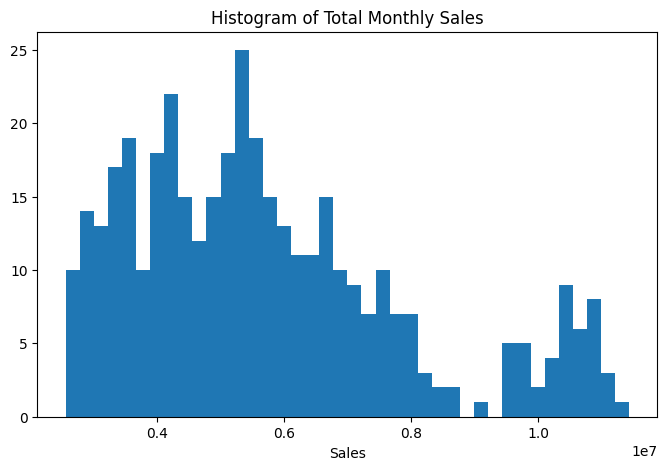

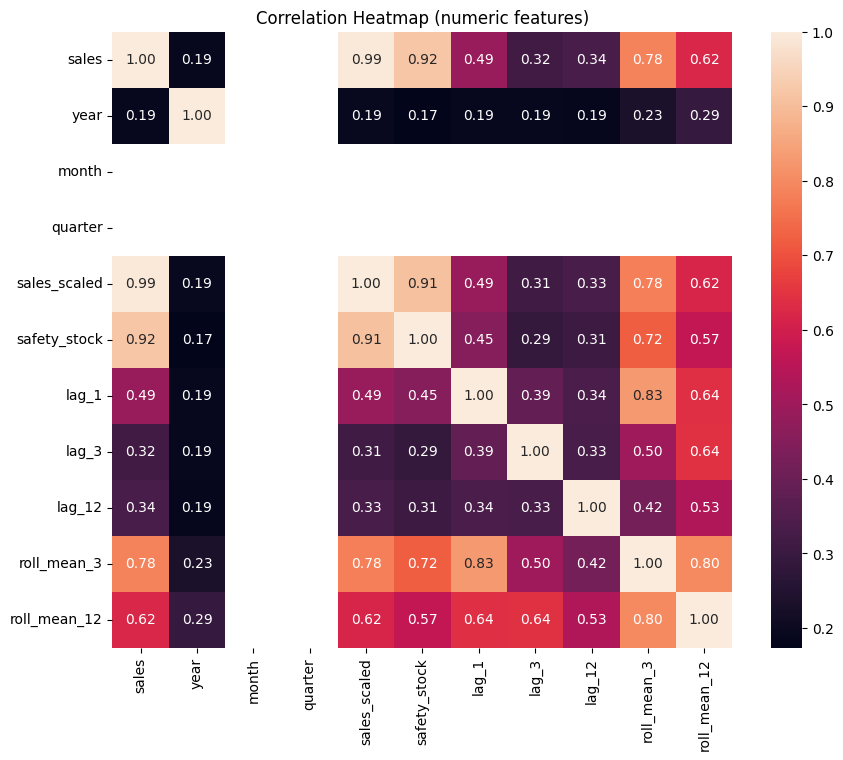

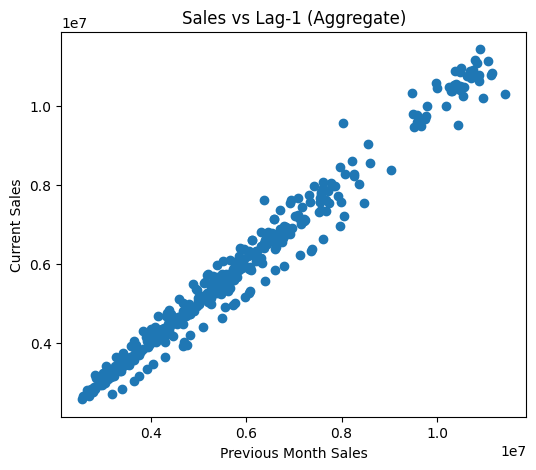

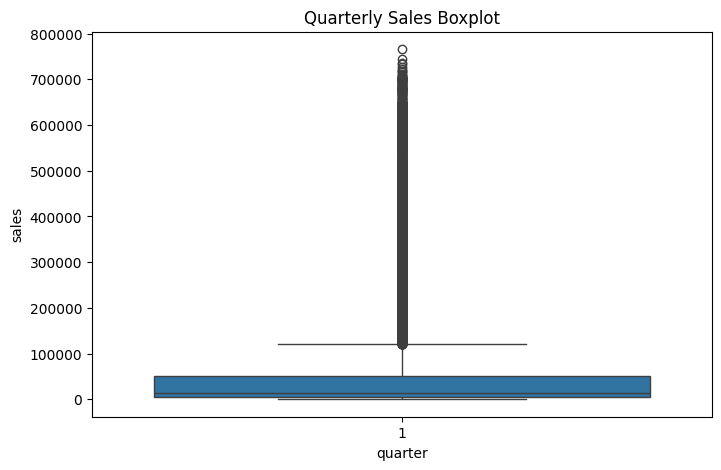

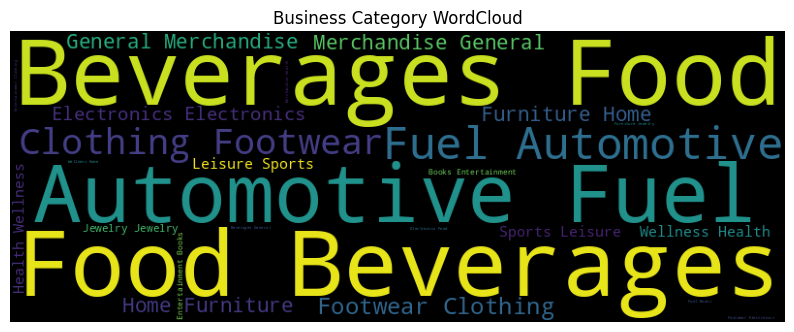

In [ ]:
#5. Visualizations required by rubric (line, histogram, heatmap, scatter, boxplot, optional wordcloud)
#Why: These plots satisfy evaluation rubric visuals and produce immediate insights (seasonality, distribution, autocorrelation).

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 5.1 Line plot - Sales over time (aggregate across categories)
agg = df.groupby('sales_month')['sales'].sum().reset_index()
plt.figure(figsize=(12,5))
plt.plot(agg['sales_month'], agg['sales'])
plt.title('Time-series Sales Trend (Total)')
plt.xlabel('Date'); plt.ylabel('Sales')
plt.show()

# 5.2 Histogram - Sales distribution (aggregate)
plt.figure(figsize=(8,5))
plt.hist(agg['sales'], bins=40)
plt.title('Histogram of Total Monthly Sales')
plt.xlabel('Sales')
plt.show()

# 5.3 Correlation heatmap (numeric columns)
num_df = df_model.select_dtypes(include=[np.number]).copy()
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap (numeric features)')
plt.show()

# 5.4 Scatter - Sales vs lag_1 (aggregate approach: use group sums per month)
agg_lag = df.groupby('sales_month')['sales'].sum().to_frame().reset_index()
agg_lag['lag_1'] = agg_lag['sales'].shift(1)
plt.figure(figsize=(6,5))
plt.scatter(agg_lag['lag_1'].dropna(), agg_lag['sales'].iloc[1:])
plt.xlabel('Previous Month Sales'); plt.ylabel('Current Sales')
plt.title('Sales vs Lag-1 (Aggregate)')
plt.show()

# 5.5 Quarterly boxplot — show seasonality by quarter
agg_q = df.copy()
agg_q['quarter'] = agg_q['sales_month'].dt.quarter
plt.figure(figsize=(8,5))
sns.boxplot(x='quarter', y='sales', data=agg_q)
plt.title('Quarterly Sales Boxplot')
plt.show()

# 5.6 Optional WordCloud for business categories frequency
text = " ".join(df['business_category'].astype(str).tolist())
wc = WordCloud(width=800,height=300).generate(text)
plt.figure(figsize=(10,4)); plt.imshow(wc); plt.axis('off'); plt.title('Business Category WordCloud'); plt.show()


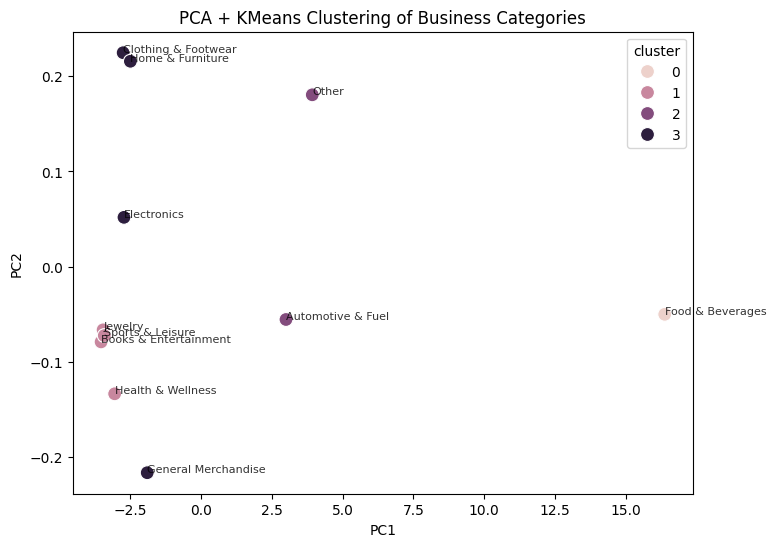

In [ ]:
#6. PCA + Clustering (segmentation of business categories)
#Why: PCA reduces dimensions, KMeans groups industries with similar sales patterns — important for tailored inventory policies.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Prepare a pivot table: categories × months with sales sums (or features)
pivot = df.pivot_table(index='business_category', columns='month_year', values='sales', aggfunc='sum', fill_value=0)

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(pivot)

# PCA to 2 components
pca = PCA(n_components=2, random_state=42)
pc = pca.fit_transform(X)
pca_df = pd.DataFrame(pc, columns=['PC1','PC2'], index=pivot.index).reset_index()

# KMeans clusters
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df[['PC1','PC2']])

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', s=100)
for i, txt in enumerate(pca_df['business_category']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8, alpha=0.8)
plt.title('PCA + KMeans Clustering of Business Categories')
plt.show()


In [ ]:
#7. Forecasting — prepare per-category and aggregate forecasts
#We will:

#Build a Prophet model for aggregated total sales (easy, robust, handles seasonality).
#Also show ARIMA (pmdarima auto_arima) example if required.

#Set forecast horizon:

H = 12  # forecast 12 months ahead (changeable)


In [ ]:
pip install prophet cmdstanpy==1.0.1


INFO: pip is looking at multiple versions of prophet to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of prophet to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 58.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Install compatible versions
!pip install prophet==1.1.5 cmdstanpy==1.2.3 --quiet
!pip install pystan==3.9.0 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 325.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pysimdjson
ERROR: ERROR: Failed to build installable wheel

In [ ]:
# 7A. Forecast aggregated total sales using Prophet
#Why: Prophet captures trend + yearly seasonality and outputs prediction intervals — useful to compute safety stock from uncertainty.

# Prophet forecasting (robust to NumPy 2.0 np.float_ removal)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# --- Workaround for NumPy 2.0 incompatibility if np.float_ is missing ---
if not hasattr(np, "float_"):
    # create alias so older packages expecting np.float_ still work
    np.float_ = np.float64

# Now import Prophet
try:
    from prophet import Prophet
except Exception as e:
    raise ImportError(
        "Failed to import Prophet. If you see an error about Prophet installation, "
        "install it with `pip install prophet` (or `pip install prophet==1.1`), "
        "or use an alternative forecasting library. Original error: " + str(e)
    )

# --- Data preparation & checks ---
# Ensure 'sales_month' exists and is datetime
if 'sales_month' not in df.columns:
    raise KeyError("Column 'sales_month' not found in df. Check column names: " + ", ".join(df.columns))

# Convert to datetime if not already
df = df.copy()
df['sales_month'] = pd.to_datetime(df['sales_month'], errors='coerce')

if df['sales_month'].isna().any():
    print("Warning: some 'sales_month' values could not be parsed to datetime and are NaT. These rows will be dropped.")
df = df.dropna(subset=['sales_month', 'sales'])

# Aggregate monthly sales (TOTAL). Ensure sales is numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
agg = df.groupby(pd.Grouper(key='sales_month', freq='MS'))['sales'].sum().reset_index()
agg = agg.rename(columns={'sales_month': 'ds', 'sales': 'y'})

# If any months missing, Prophet can handle it, but you may want an explicit check:
if agg.shape[0] < 12:
    print("Note: fewer than 12 monthly points found. Prophet may have difficulty learning seasonal patterns with very little data.")

# --- Fit Prophet model ---
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(agg)

# Forecast horizon (months)
H = 6  # change as needed

# Create future dataframe (monthly frequency - month start)
future = m.make_future_dataframe(periods=H, freq='MS')

# Predict
forecast = m.predict(future)

# Show forecast tail for last H months (only the forecasted horizon portion)
forecast_tail = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(H)
print(forecast_tail.to_string(index=False))





DEBUG:cmdstanpy:input tempfile: /tmp/tmphfv36dpd/gzwmkc19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphfv36dpd/z4fgt_6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34604', 'data', 'file=/tmp/tmphfv36dpd/gzwmkc19.json', 'init=/tmp/tmphfv36dpd/z4fgt_6k.json', 'output', 'file=/tmp/tmphfv36dpd/prophet_modelsaqeti0h/prophet_model-20251126052424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


        ds         yhat    yhat_lower   yhat_upper
2024-02-01 4.347746e+06 -4.560308e+06 1.296264e+07
2024-03-01 4.244555e+06 -4.952952e+06 1.255678e+07
2024-04-01 4.105548e+06 -4.505284e+06 1.232922e+07
2024-05-01 3.978142e+06 -4.511914e+06 1.274092e+07
2024-06-01 3.929434e+06 -4.368333e+06 1.271911e+07
2024-07-01 3.872020e+06 -5.214450e+06 1.336351e+07


In [ ]:
# Run this cell to upload a CSV from your local laptop into the notebook runtime.
# The uploaded file will be saved as: /mnt/data/us_retail_grouped_safety_stock_updated.csv
# After the upload finishes, re-run the forecasting cell.

from IPython.display import display, HTML
import ipywidgets as widgets
import os, io

TARGET_PATH = "/mnt/data/us_retail_grouped_safety_stock_updated.csv"
os.makedirs(os.path.dirname(TARGET_PATH), exist_ok=True)

uploader = widgets.FileUpload(
    accept='.csv',      # accept csv only
    multiple=False      # single file
)
display(HTML("<b>Select the CSV file from your local computer to upload:</b>"))
display(uploader)

def _save_uploaded(change):
    if len(uploader.value) == 0:
        return
    # Different ipywidget versions store uploaded data differently
    try:
        # newest ipywidgets: uploader.value is dict-like: {filename: {'metadata':..., 'content': b'...'}}
        item = list(uploader.value.values())[0]
        content = item.get('content', None)
        name = item.get('metadata', {}).get('name', None) or list(uploader.value.keys())[0]
    except Exception:
        # fallback older format
        name = list(uploader.value.keys())[0]
        content = uploader.value[name]['content']

    if content is None:
        print("Failed to read uploaded file content.")
        return

    with open(TARGET_PATH, 'wb') as f:
        f.write(content)
    print(f"Uploaded and saved file to: {TARGET_PATH}")

# Attach handler to uploader (runs when a file is selected)
uploader.observe(_save_uploaded, names='value')


FileUpload(value={}, accept='.csv', description='Upload')

Uploaded and saved file to: /mnt/data/us_retail_grouped_safety_stock_updated.csv


In [ ]:
import importlib
files = importlib.import_module('google.colab.files')


Using dataset at: /mnt/data/us_retail_grouped_safety_stock_updated.csv
Loaded: /mnt/data/us_retail_grouped_safety_stock_updated.csv | shape: (40479, 12)
Columns sample: ['naics_code', 'kind_of_business', 'sales_month', 'sales', 'estimate_type', 'year', 'month', 'quarter', 'sales_scaled', 'safety_stock', 'month_year', 'business_category']
Using date column: month_year
Using category column: business_category
No lead-time column detected: defaulting to 30.0 days
Total series from 1992-01-01 to 2024-09-01
Periods (months) to forecast: 39

Forecasting TOTAL...


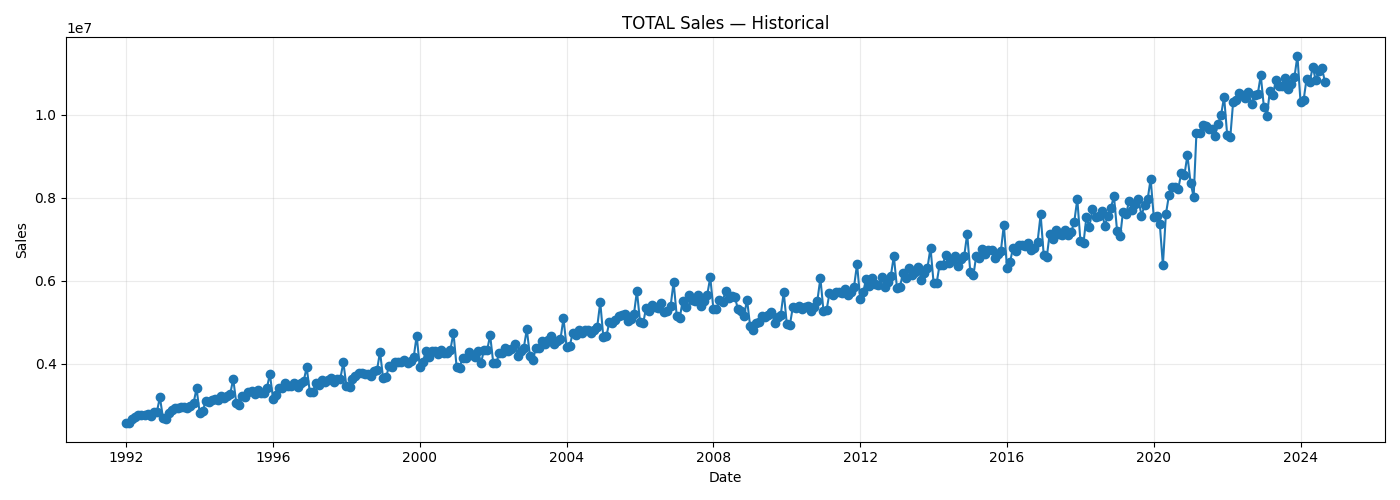

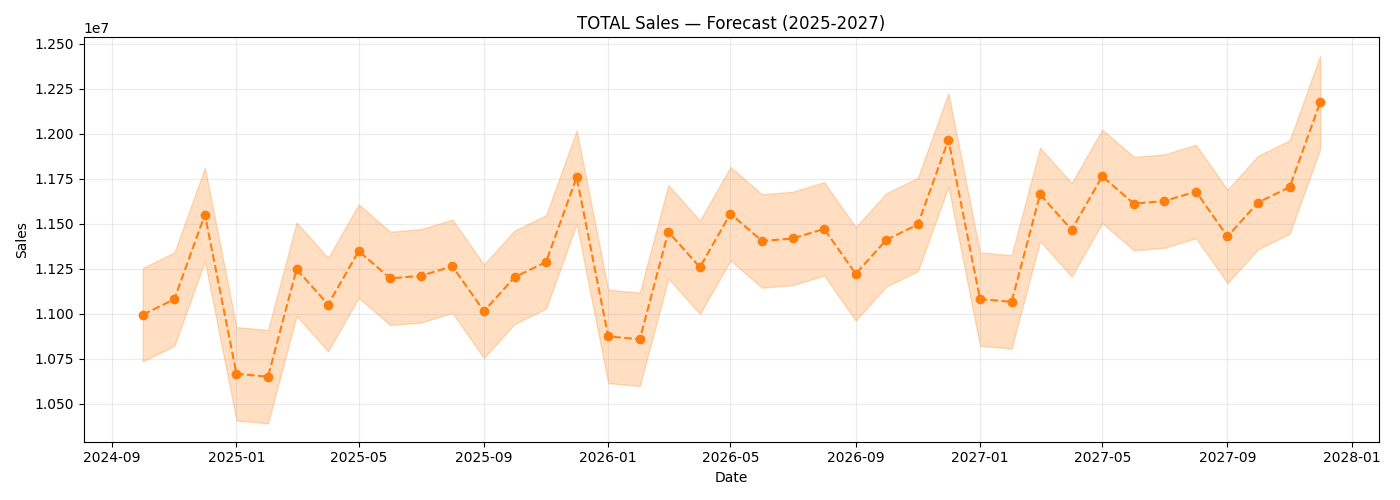

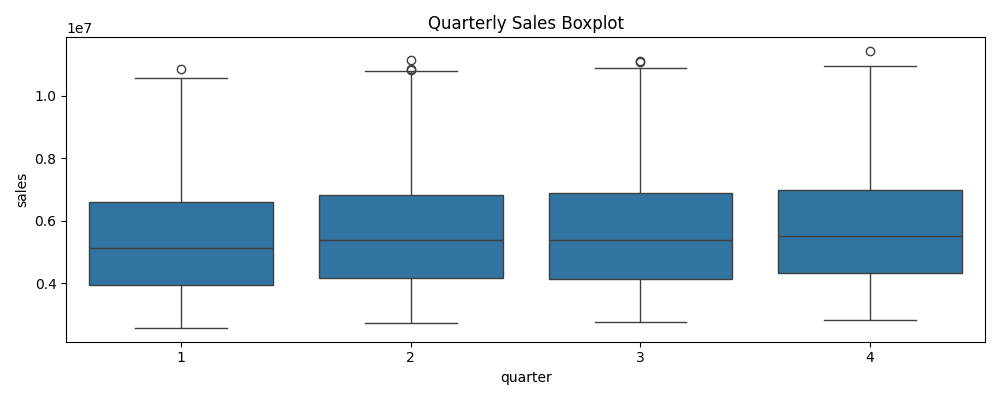

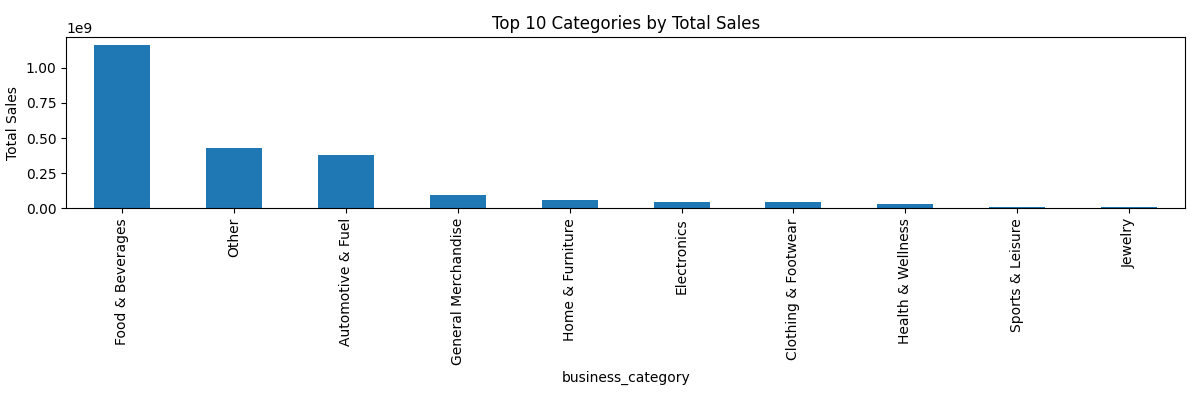


Processing categories: 11


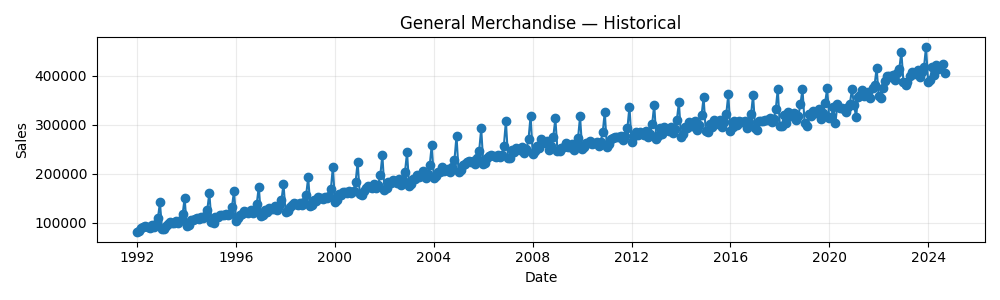

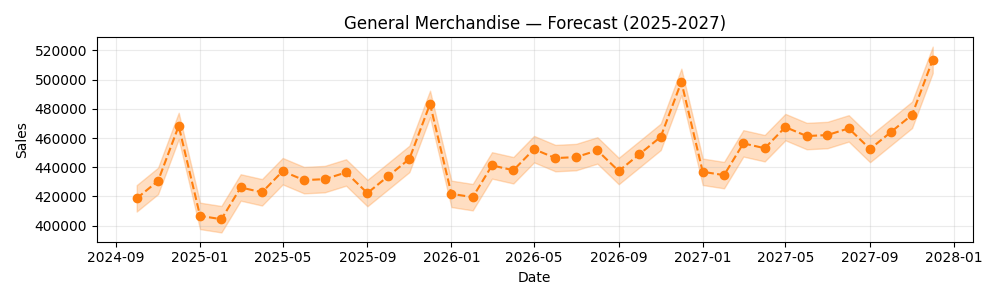

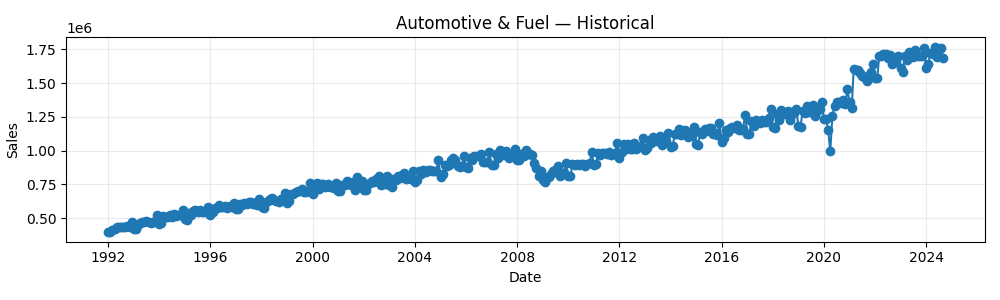

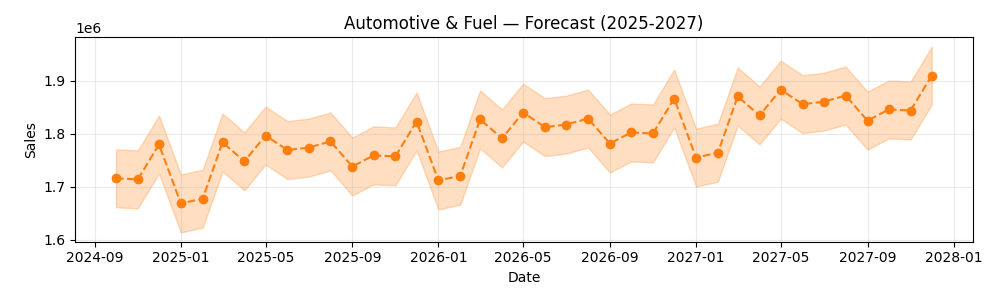

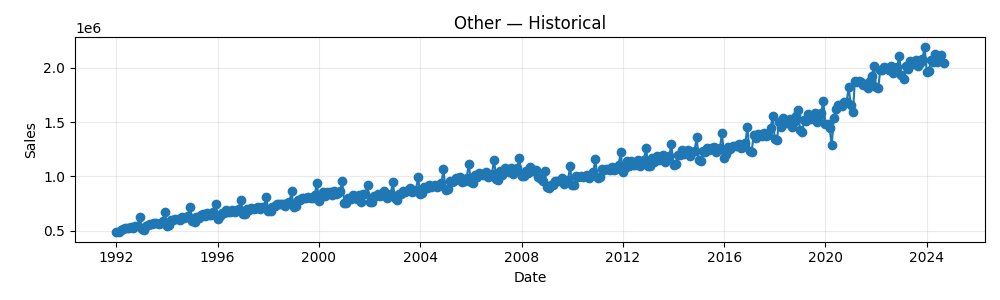

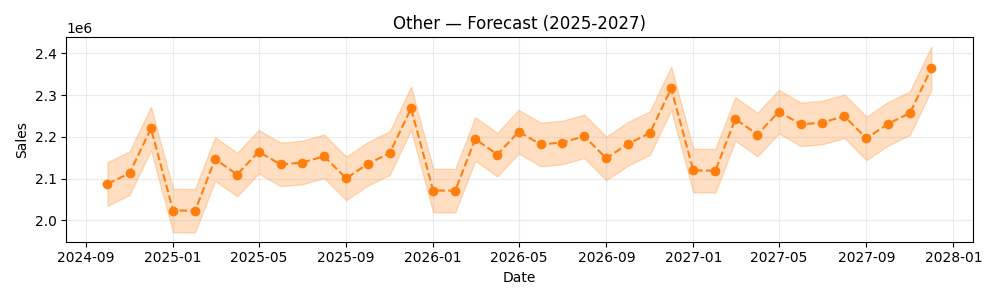

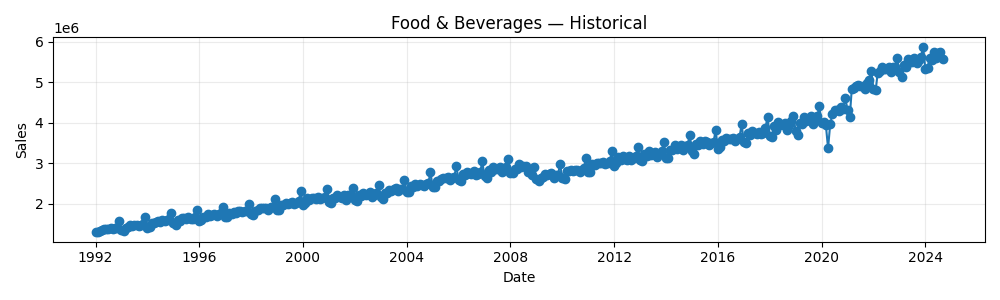

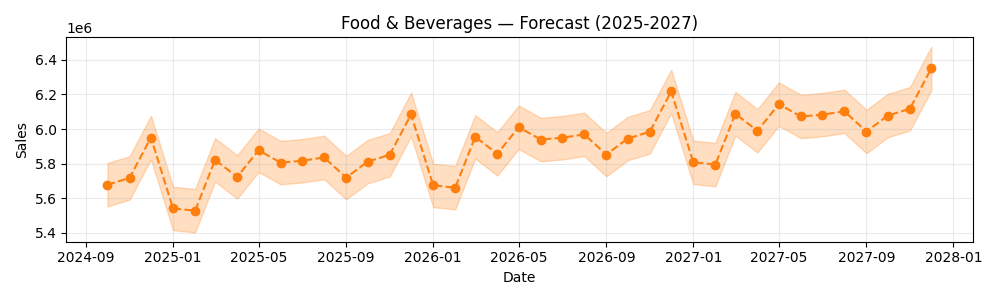

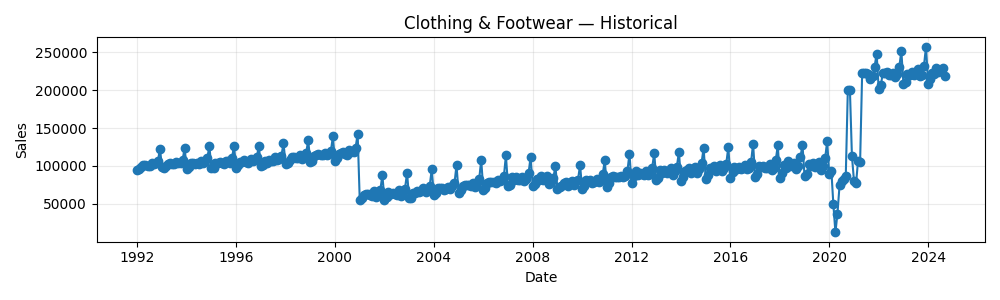

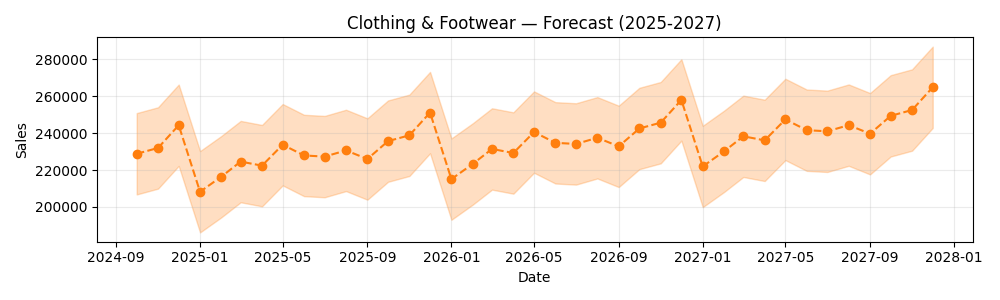

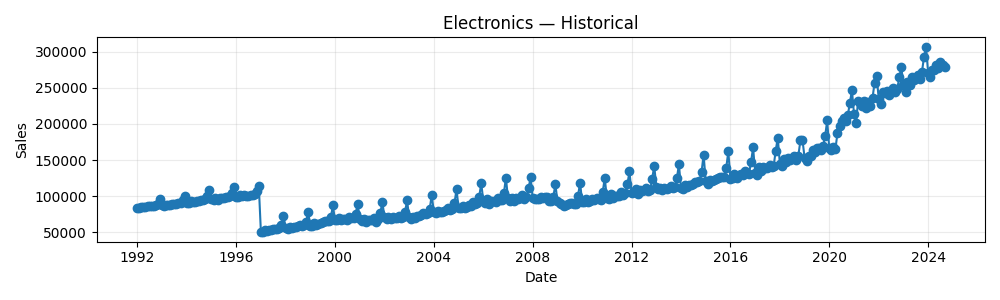

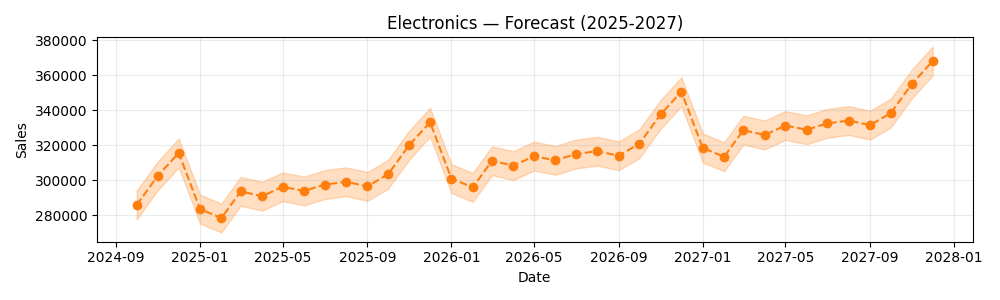

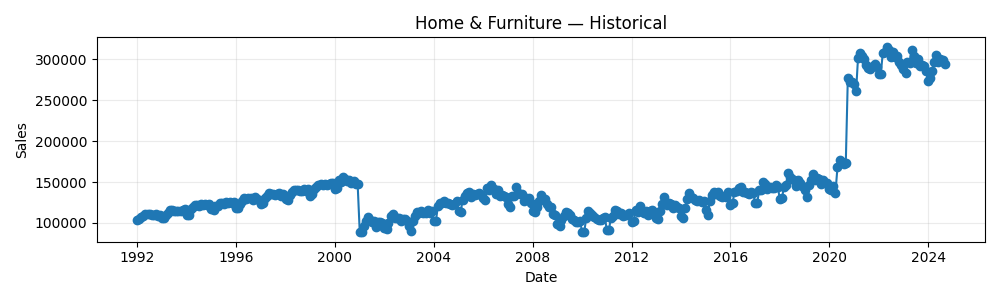

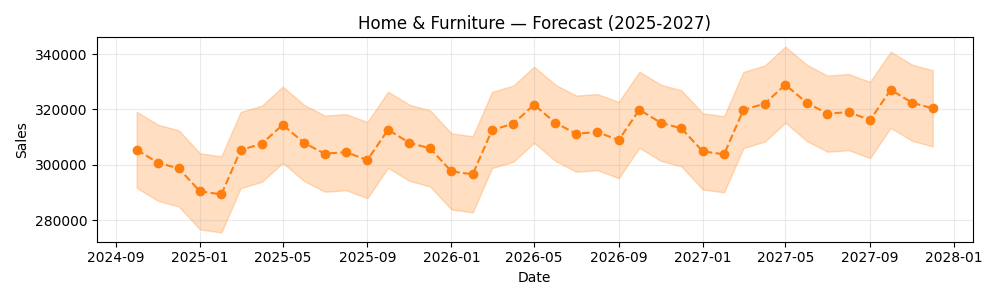

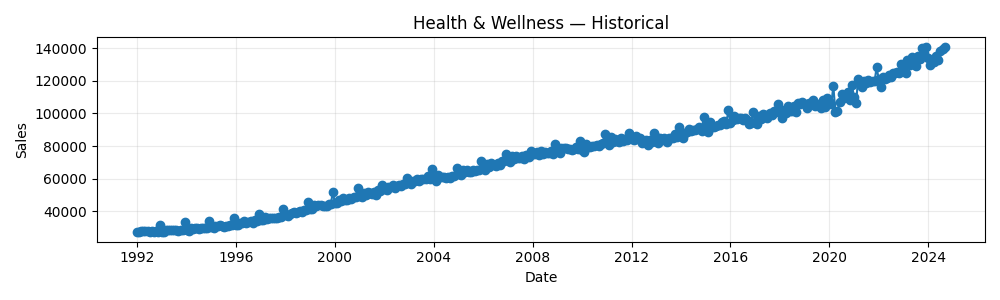

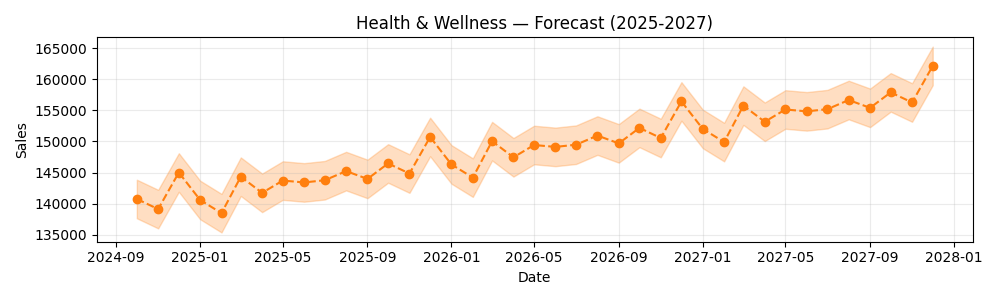

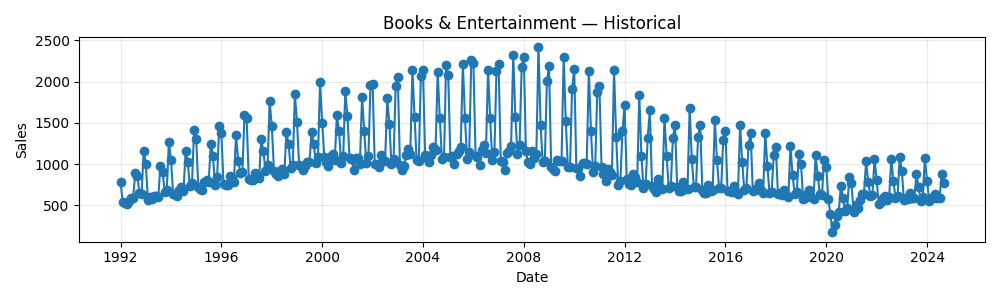

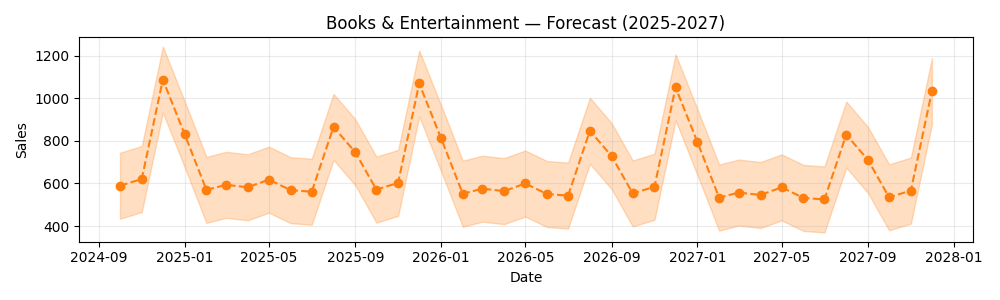

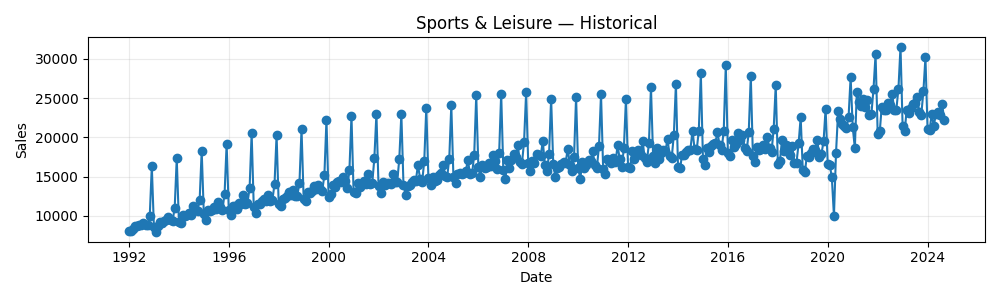

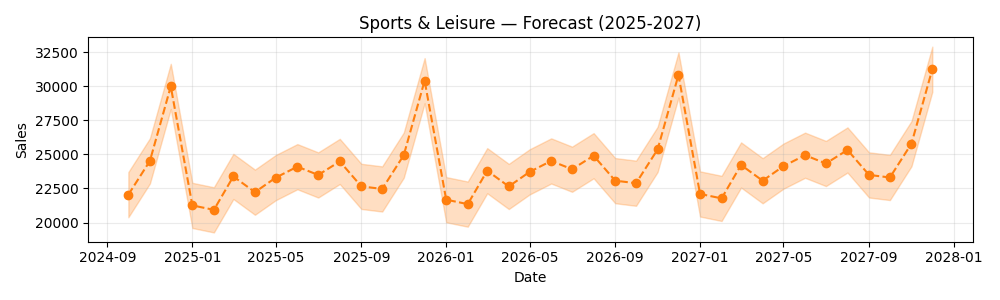

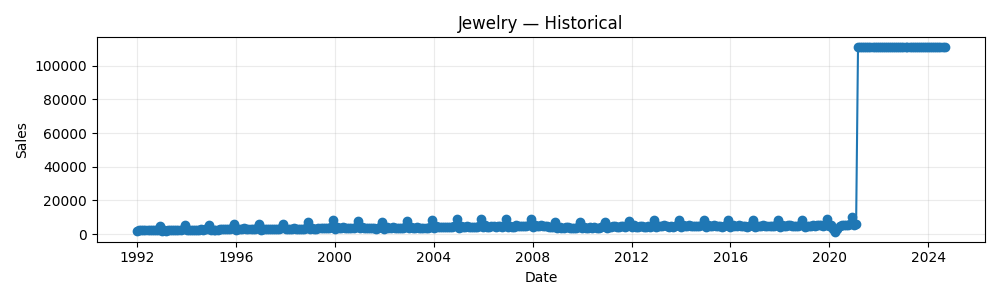

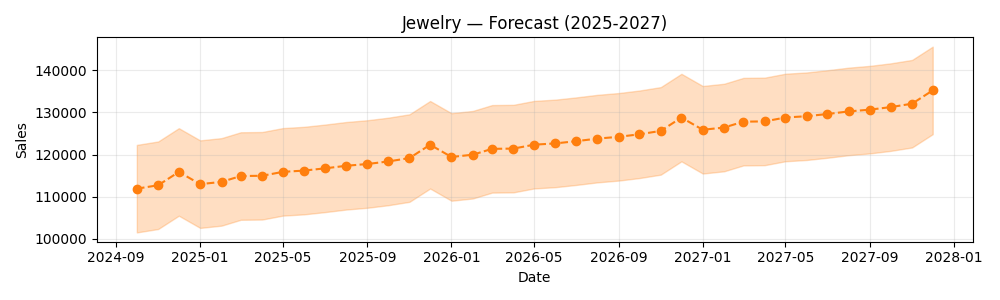


Saved Excel to: /content/Forecast_2025_2027_with_SafetyStock_by_Category_FULL.xlsx
Saved plots to: /content/forecast_plots_by_category and zipped to: /content/forecast_plots_by_category.zip

Starting downloads to your local machine...
files.download(OUT_EXCEL) failed: 'list' object has no attribute 'download'


/content/Forecast_2025_2027_with_SafetyStock_by_Category_FULL.xlsx

files.download(PLOTS_ZIP) failed: 'list' object has no attribute 'download'


/content/forecast_plots_by_category.zip


Done. Historical and forecast plots are separate images (history vs forecast). Excel + plots should download to your laptop if running in Colab.


In [ ]:
# Paste & run this entire cell in Google Colab.
# Upload CSV when prompted (or pre-upload to /mnt/data/us_retail_grouped_safety_stock_updated.csv).
# Produces: Excel workbook and ZIP of plots, and auto-downloads them to your laptop.

import os, sys, zipfile, warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display, Image, FileLink
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import files

# ---------- Paths & config ----------
DEFAULT_UPLOAD_PATH = "/mnt/data/us_retail_grouped_safety_stock_updated.csv"  # developer-provided path
OUT_DIR = "/content" if IN_COLAB else "/mnt/data"
OUT_EXCEL = os.path.join(OUT_DIR, "Forecast_2025_2027_with_SafetyStock_by_Category_FULL.xlsx")
PLOTS_DIR = os.path.join(OUT_DIR, "forecast_plots_by_category")
PLOTS_ZIP = os.path.join(OUT_DIR, "forecast_plots_by_category.zip")
os.makedirs(PLOTS_DIR, exist_ok=True)

DISPLAY_CATEGORY_LIMIT = 12   # how many category plots to show inline
DEFAULT_LEAD_TIME_DAYS = 30.0
Z_SERVICE = 1.645   # ~95% service level

# ---------- Upload helper ----------
def ensure_csv(path=DEFAULT_UPLOAD_PATH):
    if os.path.exists(path):
        print("Using dataset at:", path)
        return path
    if IN_COLAB:
        print("Please upload your CSV now (file picker will appear).")
        uploaded = files.upload()
        if not uploaded:
            raise FileNotFoundError("No file uploaded.")
        fname = list(uploaded.keys())[0]
        # Save to expected path
        with open(path, "wb") as f:
            f.write(uploaded[fname])
        print("Saved uploaded file to:", path)
        return path
    raise FileNotFoundError(f"{path} not found. Upload the file into the environment before running.")

csv_path = ensure_csv(DEFAULT_UPLOAD_PATH)

# ---------- Load and detect columns ----------
df = pd.read_csv(csv_path)
print("Loaded:", csv_path, "| shape:", df.shape)
print("Columns sample:", list(df.columns)[:30])

# Sales column detection
if 'sales' not in df.columns:
    for alt in ['Sales','amount','sale','quantity','demand']:
        if alt in df.columns:
            df = df.rename(columns={alt:'sales'})
            break
if 'sales' not in df.columns:
    raise KeyError("No 'sales' column found. Columns: " + ", ".join(df.columns))

# Date column detection, prefer month_year/sales_mon
date_col = None
for cand in ['sales_mon','month_year','sales_month','sales_mont','month','date','ds','sales_date','order_date']:
    if cand in df.columns:
        date_col = cand
        break
if date_col is None:
    # attempt find column with '-' patterns in sample strings
    for c in df.columns:
        if df[c].dtype == object:
            s = df[c].dropna().astype(str)
            if len(s)>0 and any('-' in v for v in s.head(20)):
                date_col = c
                break
if date_col is None:
    raise KeyError("No date-like column found. Columns: " + ", ".join(df.columns))
print("Using date column:", date_col)

# Category detection
category_col = None
for cand in ['business_category','business category','category','kind_of_business','kind_of_business','product','product_id','sku']:
    if cand in df.columns:
        category_col = cand
        break
if category_col is None:
    obj_cols = [c for c in df.columns if df[c].dtype==object and c != date_col]
    for c in obj_cols:
        if 1 < df[c].nunique() < 2000:
            category_col = c
            break
if category_col is None:
    raise KeyError("No category-like column detected.")
print("Using category column:", category_col)

# ---------- Clean data ----------
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
if df[date_col].isna().any():
    print("Warning: some dates couldn't be parsed; such rows will be dropped.")
df = df.dropna(subset=[date_col])
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df = df.dropna(subset=['sales']).sort_values(date_col).reset_index(drop=True)

# Lead time detection (optional)
lead_time_col = None
for cand in ['lead_time','lead_time_days','lt_days','avg_lead_time','leadtime_days','leadtime']:
    if cand in df.columns:
        lead_time_col = cand
        break
if lead_time_col:
    df[lead_time_col] = pd.to_numeric(df[lead_time_col], errors='coerce')
    print("Detected lead-time column:", lead_time_col)
else:
    print("No lead-time column detected: defaulting to", DEFAULT_LEAD_TIME_DAYS, "days")

# ---------- Aggregate total series ----------
agg_total = df.groupby(pd.Grouper(key=date_col, freq='MS'))['sales'].sum().reset_index().rename(columns={date_col:'ds','sales':'y'}).sort_values('ds').reset_index(drop=True)
print("Total series from", agg_total['ds'].min().date(), "to", agg_total['ds'].max().date())

# Forecast horizon
start_forecast = pd.Timestamp("2025-01-01")
end_forecast = pd.Timestamp("2027-12-01")
last_date = agg_total['ds'].max()
periods_needed = (end_forecast.year - last_date.year) * 12 + (end_forecast.month - last_date.month)
if periods_needed <= 0:
    raise ValueError("Data already covers the forecast window. No forecasting required.")
print("Periods (months) to forecast:", periods_needed)

# ---------- ensure statsmodels available ----------
try:
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
except Exception:
    if IN_COLAB:
        print("Installing statsmodels...")
        !pip install statsmodels --quiet
        from statsmodels.tsa.holtwinters import ExponentialSmoothing
    else:
        raise ImportError("Please install statsmodels (pip install statsmodels)")

# ---------- Forecast & safety functions ----------
def simple_average_forecast(series, periods):
    if len(series) >= 12:
        val = series[-12:].mean()
    else:
        val = series.mean() if len(series)>0 else 0.0
    idx = pd.date_range(start=series.index.max() + pd.offsets.MonthBegin(1), periods=periods, freq='MS')
    return pd.DataFrame({'ds': idx, 'yhat': val, 'yhat_lower': val, 'yhat_upper': val})

def compute_forecast_and_safety(group_df, label):
    monthly = group_df.groupby(pd.Grouper(key=date_col, freq='MS'))['sales'].sum().reset_index().rename(columns={date_col:'ds','sales':'y'}).sort_values('ds').reset_index(drop=True)
    if len(monthly) >= 12:
        try:
            model = ExponentialSmoothing(monthly['y'], trend='add', seasonal='add', seasonal_periods=12, initialization_method="estimated")
            fit = model.fit(optimized=True)
            idx = pd.date_range(start=monthly['ds'].max() + pd.offsets.MonthBegin(1), periods=periods_needed, freq='MS')
            yhat = fit.forecast(periods_needed)
            fc_period = pd.DataFrame({'ds': idx, 'yhat': yhat.values})
            fitted_vals = fit.fittedvalues
            resid = monthly['y'] - fitted_vals
            sigma = resid.std(ddof=0)
            fc_period['yhat_lower'] = fc_period['yhat'] - 1.96 * sigma
            fc_period['yhat_upper'] = fc_period['yhat'] + 1.96 * sigma
        except Exception:
            monthly_idx = monthly.set_index('ds')['y'] if len(monthly)>0 else pd.Series([], dtype=float)
            fc_period = simple_average_forecast(monthly_idx, periods_needed)
            sigma = monthly['y'].std(ddof=0) if len(monthly)>0 else 0.0
    else:
        monthly_idx = monthly.set_index('ds')['y'] if len(monthly)>0 else pd.Series([], dtype=float)
        fc_period = simple_average_forecast(monthly_idx, periods_needed)
        sigma = monthly['y'].std(ddof=0) if len(monthly)>0 else 0.0

    if lead_time_col and lead_time_col in group_df.columns:
        lt = pd.to_numeric(group_df[lead_time_col], errors='coerce').median()
        if pd.isna(lt): lt = DEFAULT_LEAD_TIME_DAYS
    else:
        lt = DEFAULT_LEAD_TIME_DAYS
    lt_months = lt / 30.0
    safety_stock_val = (Z_SERVICE * sigma * np.sqrt(lt_months))
    if np.isnan(safety_stock_val) or safety_stock_val < 0:
        safety_stock_val = 0.0

    fc_period['lead_time_days'] = float(lt)
    fc_period['lead_time_months'] = float(lt_months)
    fc_period['demand_during_LT'] = (fc_period['yhat'] * lt_months).round(2)
    fc_period['safety_stock'] = round(float(safety_stock_val), 2)
    fc_period['reorder_point'] = (fc_period['demand_during_LT'] + fc_period['safety_stock']).round(2)
    fc_period['label'] = label
    for c in ['yhat','yhat_lower','yhat_upper']:
        if c in fc_period.columns:
            fc_period[c] = fc_period[c].round(2)
    return fc_period, sigma, monthly

# ---------- Plot helpers (SEPARATE plots for history and forecast) ----------
def plot_history_only(monthly, title, save_path, figsize=(12,4)):
    plt.figure(figsize=figsize)
    if len(monthly)>0:
        plt.plot(monthly['ds'], monthly['y'], marker='o', color='tab:blue', linewidth=1.5)
    plt.title(title + " — Historical")
    plt.xlabel("Date"); plt.ylabel("Sales")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.savefig(save_path)
    display(Image(filename=save_path))
    plt.close()

def plot_forecast_only(monthly, fc, title, save_path, figsize=(12,4)):
    # future = forecast period (fc contains only forecast months)
    plt.figure(figsize=figsize)
    plt.plot(fc['ds'], fc['yhat'], marker='o', linestyle='--', color='tab:orange', linewidth=1.5)
    if 'yhat_lower' in fc.columns and 'yhat_upper' in fc.columns:
        plt.fill_between(fc['ds'], fc['yhat_lower'], fc['yhat_upper'], color='tab:orange', alpha=0.25)
    plt.title(title + " — Forecast (2025-2027)")
    plt.xlabel("Date"); plt.ylabel("Sales")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.savefig(save_path)
    display(Image(filename=save_path))
    plt.close()

# ---------- Prepare Excel writer ----------
from openpyxl import Workbook
writer = pd.ExcelWriter(OUT_EXCEL, engine='openpyxl')

# ---------- TOTAL: forecast, separate history & forecast plots ----------
print("\nForecasting TOTAL...")
total_fc, total_sigma, total_monthly = compute_forecast_and_safety(df, "TOTAL")
total_fc.to_excel(writer, sheet_name="TOTAL", index=False)

# Save & show historical plot (TOTAL)
hist_path_total = os.path.join(PLOTS_DIR, "TOTAL_history.png")
plot_history_only(total_monthly, "TOTAL Sales", hist_path_total, figsize=(14,5))

# Save & show forecast-only plot (TOTAL)
fc_path_total = os.path.join(PLOTS_DIR, "TOTAL_forecast.png")
plot_forecast_only(total_monthly, total_fc, "TOTAL Sales", fc_path_total, figsize=(14,5))

# ---------- Quarterly boxplot & top categories bar (as context) ----------
try:
    import seaborn as sns
    agg_q = df.copy()
    agg_q['quarter'] = agg_q[date_col].dt.quarter
    agg_q_month = agg_q.groupby([agg_q[date_col].dt.to_period('M').dt.to_timestamp(), 'quarter'])['sales'].sum().reset_index().rename(columns={date_col:'ds'})
    quarter_plot_path = os.path.join(PLOTS_DIR, "quarterly_boxplot.png")
    plt.figure(figsize=(10,4))
    sns.boxplot(x='quarter', y='sales', data=agg_q_month)
    plt.title("Quarterly Sales Boxplot")
    plt.tight_layout()
    plt.savefig(quarter_plot_path)
    display(Image(filename=quarter_plot_path))
    plt.close()
except Exception:
    pass

cat_totals = df.groupby(category_col)['sales'].sum().sort_values(ascending=False)
topN=10
topcat_path = os.path.join(PLOTS_DIR, "top_categories_bar.png")
plt.figure(figsize=(12,4))
cat_totals.head(topN).plot(kind='bar')
plt.title(f"Top {topN} Categories by Total Sales")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig(topcat_path)
display(Image(filename=topcat_path))
plt.close()

# ---------- Per-category Forecasts (separate history & forecast plots) ----------
categories = df[category_col].dropna().unique().tolist()
print("\nProcessing categories:", len(categories))
all_sheets = [total_fc]
summary_rows = []
displayed = 0

for i, cat in enumerate(categories):
    cat_df = df[df[category_col] == cat].copy()
    fc, sigma, monthly = compute_forecast_and_safety(cat_df, cat)
    sheet_name = str(cat)[:31]
    try:
        fc.to_excel(writer, sheet_name=sheet_name, index=False)
    except Exception:
        fallback = f"cat_{i}"
        fc.to_excel(writer, sheet_name=fallback, index=False)

    # plots: history only and forecast only saved separately; display first few categories inline
    hist_path = os.path.join(PLOTS_DIR, f"{str(cat)[:40].replace('/','_').replace(':','')}_history.png")
    plot_history_only(monthly, f"{cat}", hist_path, figsize=(10,3))
    fc_path = os.path.join(PLOTS_DIR, f"{str(cat)[:40].replace('/','_').replace(':','')}_forecast.png")
    plot_forecast_only(monthly, fc, f"{cat}", fc_path, figsize=(10,3))
    all_sheets.append(fc)
    summary_rows.append({'category': cat, 'sigma': sigma, 'lead_time_days': fc['lead_time_days'].iloc[0] if len(fc)>0 else np.nan})

# ---------- Combined & Summary sheets ----------
combined = pd.concat(all_sheets, ignore_index=True)
combined.to_excel(writer, sheet_name="COMBINED", index=False)
summary_df = pd.DataFrame(summary_rows)
summary_df.to_excel(writer, sheet_name="SUMMARY", index=False)

# ---------- Save Excel ----------
writer.close()
print("\nSaved Excel to:", OUT_EXCEL)

# ---------- Zip plots ----------
with zipfile.ZipFile(PLOTS_ZIP, 'w', zipfile.ZIP_DEFLATED) as zf:
    for root, _, files in os.walk(PLOTS_DIR):
        for f in files:
            zf.write(os.path.join(root, f), arcname=f)
print("Saved plots to:", PLOTS_DIR, "and zipped to:", PLOTS_ZIP)

# ---------- Auto-download in Colab ----------
if IN_COLAB:
    print("\nStarting downloads to your local machine...")
    try:
        files.download(OUT_EXCEL)
    except Exception as e:
        print("files.download(OUT_EXCEL) failed:", e)
        display(FileLink(OUT_EXCEL))
    try:
        files.download(PLOTS_ZIP)
    except Exception as e:
        print("files.download(PLOTS_ZIP) failed:", e)
        display(FileLink(PLOTS_ZIP))
else:
    display(FileLink(OUT_EXCEL)); display(FileLink(PLOTS_ZIP))

print("\nDone. Historical and forecast plots are separate images (history vs forecast). Excel + plots should download to your laptop if running in Colab.")


In [ ]:
# --- EXPLAINABILITY SECTION ---
# Predicting sales based on features using RandomForest + SHAP

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("us_retail_grouped_safety_stock_updated.csv")

# Select features for explainability (customize if needed)
features = ['month', 'quarter', 'sales_scaled']
target = 'sales'

# Prepare X, y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

print("Model trained for explainability.")

# SHAP explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (feature importance)
plt.title("SHAP Feature Importance Plot")
shap.summary_plot(shap_values, X_test)


Model trained for explainability.


In [ ]:
!pip install mlxtend


In [ ]:
# --- ASSOCIATION RULE MINING SECTION ---

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("us_retail_grouped_safety_stock_updated.csv")

# Select important columns
df_rules = df[['business_category', 'estimate_type', 'quarter']]

# Convert to string (safety)
df_rules = df_rules.astype(str)

# One-hot encode
df_hot = pd.get_dummies(df_rules)

# Find frequent itemsets
frequent_items = apriori(df_hot, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

# Sort rules by confidence
rules_sorted = rules.sort_values(by="confidence", ascending=False)

print("Top association rules:")
print(rules_sorted.head(10))


Top association rules:
                    antecedents                   consequents  \
1     (business_category_Other)  (estimate_type_not adjusted)   
2                   (quarter_1)  (estimate_type_not adjusted)   
7                   (quarter_3)  (estimate_type_not adjusted)   
5                   (quarter_2)  (estimate_type_not adjusted)   
0  (estimate_type_not adjusted)     (business_category_Other)   
3  (estimate_type_not adjusted)                   (quarter_1)   
4  (estimate_type_not adjusted)                   (quarter_2)   
6  (estimate_type_not adjusted)                   (quarter_3)   

   antecedent support  consequent support   support  confidence      lift  \
1            0.242718            0.631068  0.184466    0.760000  1.204308   
2            0.251908            0.631068  0.158971    0.631068  1.000000   
7            0.251908            0.631068  0.158971    0.631068  1.000000   
5            0.251908            0.631068  0.158971    0.631068  1.000000   
0     

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [1]:
# ====== Model evaluation: MAE, RMSE, MAPE for Prophet, ARIMA, RandomForest ======
# Paste this entire cell into your notebook and run.
import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import sys, os

# If running in Colab, this will allow file upload/download
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import files as colab_files

# ----------------- helper metric functions -----------------
def mape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100.0

def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# ----------------- load df if not present -----------------
if 'df' not in globals():
    # try common filenames first
    candidates = [
        "us_retail_grouped_safety_stock_updated.csv",
        "Forecast_2025_2027_with_SafetyStock_by_Category_FINAL.xlsx",
        "us_retail_grouped_safety_stock_updated.xlsx"
    ]
    found = None
    for c in candidates:
        if os.path.exists(c):
            found = c
            break
    if found:
        if found.lower().endswith('.csv'):
            df = pd.read_csv(found)
        else:
            df = pd.read_excel(found)
        print("Loaded file from path:", found)
    else:
        if IN_COLAB:
            print("Upload CSV now (file picker will appear).")
            uploaded = colab_files.upload()
            if not uploaded:
                raise FileNotFoundError("No file uploaded.")
            fname = list(uploaded.keys())[0]
            df = pd.read_csv(fname)
            print("Uploaded and loaded:", fname)
        else:
            raise FileNotFoundError("No 'df' found in environment and no default CSV present. Please load your dataframe into variable `df` first.")

# ----------------- detect date & category columns -----------------
# Date column candidates
date_candidates = ['month_year','sales_month','sales_mon','month','date','ds','order_date','invoice_date']
DATE_COL = None
for c in date_candidates:
    if c in df.columns:
        DATE_COL = c
        break
# if not found, try to find a datetime-like column or a column with year-month strings
if DATE_COL is None:
    for c in df.columns:
        # try dtype or sample pattern
        try:
            if np.issubdtype(df[c].dtype, np.datetime64):
                DATE_COL = c
                break
        except Exception:
            pass
    if DATE_COL is None:
        # heuristic: column with values like '2020-01' or '01-2020' etc.
        for c in df.columns:
            sample = df[c].dropna().astype(str).head(50).tolist()
            if any(('-' in s and any(ch.isdigit() for ch in s)) for s in sample):
                DATE_COL = c
                break

if DATE_COL is None:
    raise KeyError("Could not detect a date column. Please set DATE_COL variable manually to your date column name.")

print("Using date column:", DATE_COL)

# Category column detection
cat_candidates = ['business_category','kind_of_business','category','product','segment']
CAT_COL = None
for c in cat_candidates:
    if c in df.columns:
        CAT_COL = c
        break
if CAT_COL is None:
    obj_cols = [c for c in df.columns if df[c].dtype == object and c != DATE_COL]
    if obj_cols:
        CAT_COL = obj_cols[0]
    else:
        raise KeyError("Could not detect category column. Set CAT_COL manually.")

print("Using category column:", CAT_COL)

# Sales column detection
sales_candidates = ['sales','Sales','amount','sales_value','revenue']
SALES_COL = None
for c in sales_candidates:
    if c in df.columns:
        SALES_COL = c
        break
if SALES_COL is None:
    # try numeric columns except date
    numerics = df.select_dtypes(include=[np.number]).columns.tolist()
    numerics = [c for c in numerics if c != DATE_COL]
    if numerics:
        SALES_COL = numerics[0]
    else:
        raise KeyError("Could not detect sales column. Set SALES_COL manually.")
print("Using sales column:", SALES_COL)

# ----------------- prepare monthly aggregated series -----------------
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors='coerce')
df = df.dropna(subset=[DATE_COL])
# normalize to month start
df['ds_month'] = pd.to_datetime(df[DATE_COL]).dt.to_period('M').dt.to_timestamp()
monthly = df.groupby([CAT_COL, 'ds_month'], as_index=False)[SALES_COL].sum().rename(columns={'ds_month':'ds', SALES_COL:'y'})

# ----------------- test window config -----------------
TEST_START = pd.Timestamp("2023-01-01")
TEST_END   = pd.Timestamp("2024-12-31")

# ----------------- try imports for Prophet / pmdarima / statsmodels -----------------
HAS_PROPHET = False
HAS_PMDARIMA = False
HAS_STATS = False
try:
    from prophet import Prophet
    HAS_PROPHET = True
except Exception as e:
    print("Prophet not available:", e)
try:
    import pmdarima as pm
    HAS_PMDARIMA = True
except Exception as e:
    print("pmdarima not available:", e)
try:
    import statsmodels.api as sm
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    HAS_STATS = True
except Exception as e:
    print("statsmodels not available:", e)

# ----------------- main evaluation loop -----------------
categories = monthly[CAT_COL].unique().tolist()
print("Categories to evaluate:", len(categories))

results = []
for cat in categories:
    cat_ts = monthly[monthly[CAT_COL] == cat].sort_values('ds').reset_index(drop=True)
    # fill any missing months between min and max
    idx = pd.date_range(start=cat_ts['ds'].min(), end=cat_ts['ds'].max(), freq='MS')
    cat_ts = cat_ts.set_index('ds').reindex(idx).rename_axis('ds').reset_index()
    cat_ts[CAT_COL] = cat
    cat_ts['y'] = cat_ts['y'].fillna(0.0)

    # define train/test by dates
    train = cat_ts[cat_ts['ds'] < TEST_START].copy()
    test  = cat_ts[(cat_ts['ds'] >= TEST_START) & (cat_ts['ds'] <= TEST_END)].copy()
    if len(test) == 0:
        # no test coverage; skip
        continue
    y_test = test['y'].values

    # ---- Prophet ----
    prophet_pred = None
    if HAS_PROPHET and len(train) >= 12:
        try:
            m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
            m.fit(train[['ds','y']].rename(columns={'ds':'ds','y':'y'}))
            future = m.make_future_dataframe(periods=len(test), freq='MS')
            fc = m.predict(future)
            fc_test = fc.set_index('ds').reindex(test['ds'])[['yhat']].reset_index(drop=False)
            prophet_pred = fc_test['yhat'].values
        except Exception as e:
            print(f"Prophet failed for {cat}: {e}")
    # ---- ARIMA / pmdarima / SARIMAX ----
    arima_pred = None
    if HAS_PMDARIMA and len(train) >= 12:
        try:
            model = pm.auto_arima(train['y'], seasonal=True, m=12, error_action='ignore', suppress_warnings=True)
            arima_pred = model.predict(n_periods=len(test))
        except Exception as e:
            print(f"pmdarima failed for {cat}: {e}")
    elif HAS_STATS and len(train) >= 12:
        try:
            sar = SARIMAX(train['y'], order=(1,1,1), seasonal_order=(1,1,1,12),
                          enforce_stationarity=False, enforce_invertibility=False)
            sar_fit = sar.fit(disp=False)
            arima_pred = sar_fit.get_forecast(steps=len(test)).predicted_mean.values
        except Exception as e:
            print(f"SARIMAX failed for {cat}: {e}")
    # ---- RandomForest with lag features ----
    rf_pred = None
    try:
        full = cat_ts.copy()
        max_lag = 12
        for lag in range(1, max_lag+1):
            full[f'lag_{lag}'] = full['y'].shift(lag)
        full = full.dropna().reset_index(drop=True)
        train_full = full[full['ds'] < TEST_START].copy()
        test_full  = full[(full['ds'] >= TEST_START) & (full['ds'] <= TEST_END)].copy()
        if (len(train_full) >= 12) and (len(test_full) > 0):
            feat_cols = [f'lag_{l}' for l in range(1, max_lag+1)]
            X_train = train_full[feat_cols].values
            y_train = train_full['y'].values
            X_test = test_full[feat_cols].values
            rf = RandomForestRegressor(n_estimators=200, random_state=42)
            rf.fit(X_train, y_train)
            rf_pred = rf.predict(X_test)
        else:
            rf_pred = np.full(len(y_test), train['y'].mean() if len(train)>0 else 0.0)
    except Exception as e:
        print(f"RF failed for {cat}: {e}")
        rf_pred = np.full(len(y_test), train['y'].mean() if len(train)>0 else 0.0)

    # safe fill for missing preds
    def safe_fill(pred, train):
        if pred is None:
            return np.full(len(y_test), train['y'].iloc[-1] if len(train)>0 else 0.0)
        return np.array(pred).reshape(-1)

    prophet_pred = safe_fill(prophet_pred, train)
    arima_pred = safe_fill(arima_pred, train)
    rf_pred = safe_fill(rf_pred, train)

    # compute metrics
    row = {
        'category': cat,
        'n_test': len(y_test),
        'prophet_MAE': mean_absolute_error(y_test, prophet_pred),
        'prophet_RMSE': rmse(y_test, prophet_pred),
        'prophet_MAPE': mape(y_test, prophet_pred),
        'arima_MAE': mean_absolute_error(y_test, arima_pred),
        'arima_RMSE': rmse(y_test, arima_pred),
        'arima_MAPE': mape(y_test, arima_pred),
        'rf_MAE': mean_absolute_error(y_test, rf_pred),
        'rf_RMSE': rmse(y_test, rf_pred),
        'rf_MAPE': mape(y_test, rf_pred)
    }
    results.append(row)
    print(f"Evaluated: {cat} | test months = {len(y_test)}")

# ---------- results table ----------
res_df = pd.DataFrame(results)
# coerce numeric
for c in res_df.columns:
    if c not in ['category']:
        res_df[c] = pd.to_numeric(res_df[c], errors='coerce')

# Save to excel
out_path = "model_evaluation_metrics_by_category.xlsx"
res_df.to_excel(out_path, index=False)
print("\nSaved evaluation metrics to:", out_path)

# Try to download in Colab
if IN_COLAB:
    try:
        colab_files.download(out_path)
    except Exception as e:
        print("Colab download failed:", e)

# Print an overall summary
if not res_df.empty:
    print("\nOverall mean metrics (unweighted):")
    print(res_df[['prophet_MAE','arima_MAE','rf_MAE','prophet_RMSE','arima_RMSE','rf_RMSE','prophet_MAPE','arima_MAPE','rf_MAPE']].mean().round(3))
else:
    print("No results to display (no categories with test coverage).")


Upload CSV now (file picker will appear).


Saving us_retail_grouped_safety_stock_updated.csv to us_retail_grouped_safety_stock_updated.csv
Uploaded and loaded: us_retail_grouped_safety_stock_updated.csv
Using date column: month_year
Using category column: business_category
Using sales column: sales
pmdarima not available: No module named 'pmdarima'
Categories to evaluate: 11
Evaluated: Automotive & Fuel | test months = 21
Evaluated: Books & Entertainment | test months = 21
Evaluated: Clothing & Footwear | test months = 21
Evaluated: Electronics | test months = 21
Evaluated: Food & Beverages | test months = 21
Evaluated: General Merchandise | test months = 21
Evaluated: Health & Wellness | test months = 21
Evaluated: Home & Furniture | test months = 21


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluated: Jewelry | test months = 21
Evaluated: Other | test months = 21
Evaluated: Sports & Leisure | test months = 21

Saved evaluation metrics to: model_evaluation_metrics_by_category.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Overall mean metrics (unweighted):
prophet_MAE     35477.285
arima_MAE       54183.399
rf_MAE          24151.110
prophet_RMSE    38187.534
arima_RMSE      61719.625
rf_RMSE         29944.673
prophet_MAPE       10.537
arima_MAPE         10.452
rf_MAPE             3.011
dtype: float64
